# Assignment 3: Network Simulation
## CS166 | Prof. Drummond
### Anirudh Nair

# Basic Model

This model basically simulates interactions between people in a society using a Watts-Strogartz graph. It achieves this by modelling people's opinions and the relationships between these people and then simulating how the opinions and relationships change over time. The model makes two main assumptions which define the logic and mathematics of the model.
1. People form relationships with other people who share similar opinions to them.
2. People with strong relationships tend to converge their opinions over time. 

#### Nodes
Nodes in this model represent people in a society. Thus, each each node consists of an attribute which stores information about their opinion on a scale of 0 to 1. The closer the opinion value of two nodes is, the more the two nodes agree and vice versa. 

#### Edges
Edges in this model represent relationships between the people(nodes). Thus, each of these edges have a weight associated with them and the higher the weight, the stronger the relationship between the two people connected by the edge. Thus, a weight close to 0 would mean a very weak relationship and a weight close to 1 would mean a very strong relationship.

# Rules

There are three primary rules by which the model is updated

1. When two people interact with each other, their opinions converge towards each other propotionally to the strength of their relationship.

Thus, the code selects one edge from the network at random to simulate an interaction. Based on the weight of the edge, the opinions of the two nodes connected by the edge are updated to simulate the change in opinion. The stronger the weight of the edge, the closer the opinions of the nodes will become. 

For two nodes i and j, the following equation is used to calculate the change in the opinion of node i:
$\Delta o_i = \alpha w_{ij}(o_j-o_i)$

The equation for Rule 1 contains the parameter $\alpha$ which models how much a person changes their opinion based on the interaction with the other person. A high value for $\alpha$ would mean that the person's opinion would be influenced a lot by an interaction, while a lower valye of $\alpha$ would mean that the person's opinion faces a minor change in opinion through the interaction.  

2. The strength of the relationships between the two people interacting changes based on the difference between their opinions. 

Thus, when the interaction being simulated by rule 1 is occuring, the weight of the edge connecting the two nodes is changed based on the difference between the opinions of the two nodes. When the weight of an edge falls below 0.05, their relationship is terminated.

The change in the edge weight of two nodes i and j is calculated using the following equation: $\Delta w_{ij} = \beta w_{ij}(1-w_{ij})(1-\gamma |o_i-o_j|)$

The equation for Rule 2 contains two parameters:

 $\beta$ which models how quickly the relationship between the two interacting nodes change. Thus a high value of  $\beta$ would mean that each interaction would have a substantial effect on the relationship and a low value would mean that each interaction wouldn't affect the relationshoip much.
 
 $\gamma$ which models the sensitivity to opposing opinions. Thus, a value greater than 1 would model high sensitivity to opposing opinions, changing the relationship drastically and value lesser than 1 would mean low sensitivity to opposing opinions. 

3. New relationships pop up within the network based on a specified probability. 

Based on a specified probability level (generally kept low to model reality at around 1%), two nodes are selected from the network and a new edge is constructed between them, modelling a new relationship. The weight of the newly constructed edge is kept at 0.5, which then changes based on the interactions between them defined by rule 1 and rule 2. 



In [2]:
from matplotlib import pyplot as plt
from scipy import stats
import networkx as nx
import random
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [58]:
#Adapted from C. Scheffler: https://gist.github.com/cscheffler/f8f8416513356e184e9568fa69c90889

class SocialDynamicsSimulation:
    '''
    Simulate social dynamics by strengthening opinions and connection weights
    based on random interactions between nodes.
    '''

    def __init__(self, network_size=50, alpha=0.03, beta=0.3, gamma=4):
        '''
        Inputs:

            network_size (int) The number of nodes in the random Watts-Strogatz
              small-world network. Default: 50.

            alpha (float) The rate at which nodes adjust their opinions to
              match neighboring nodes' opinions during interactions.
              Default: 0.03.

            beta (float) The rate at which edge weights are changed in
              response to differing opinions. Default: 0.3.

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4.
        '''
        self.network_size = network_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def initialize(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.5.
        '''
        self.graph = nx.watts_strogatz_graph(50, 5, 0.5)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 0.5
        for node in self.graph.nodes:
            self.graph.nodes[node]['opinion'] = random.randint(0, 1)
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0

    def observe(self):
        '''
        Draw the state of the network.
        '''
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        plt.clf()
        nx.draw(
            self.graph, pos=self.layout, with_labels=True,
            node_color=[self.graph.nodes[i]['opinion'] for i in self.graph.nodes],
            edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)
        plt.title('Step: ' + str(self.step))

    def update(self):
        if random.uniform(0, 1) < 0.01:
            # Create a new edge with weight 0.5 between two unconnected nodes
            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=0.5)
        else:
            # Select a random edge and update node opinions and edge weight
            edge = random.choice(list(self.graph.edges))
            weight = self.graph.edges[edge]['weight']
            opinions = [self.graph.nodes[n]['opinion'] for n in edge]
            for i in [0, 1]:
                self.graph.nodes[edge[i]]['opinion'] = (
                    opinions[i] + self.alpha * weight * (opinions[1-i] - opinions[i]))
            self.graph.edges[edge]['weight'] = (
                weight +
                self.beta * weight * (1-weight) *
                (1 - self.gamma * abs(opinions[0] - opinions[1])))
            # Remove very weak connections
            if self.graph.edges[edge]['weight'] < 0.05:
                self.graph.remove_edge(*edge)
        self.step += 1


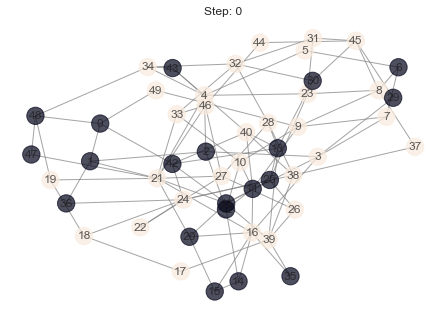

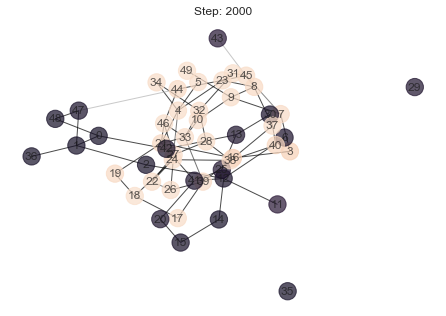

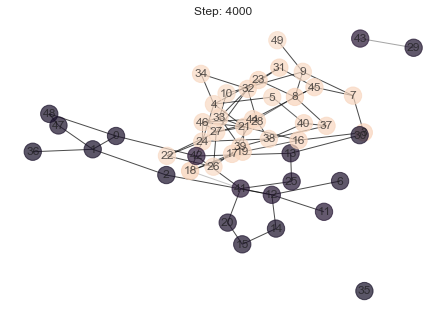

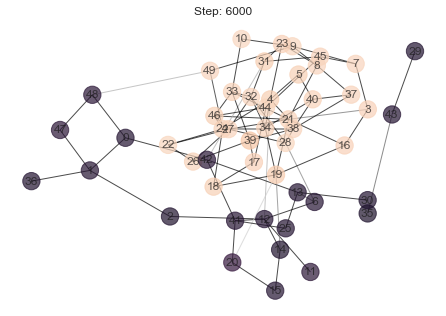

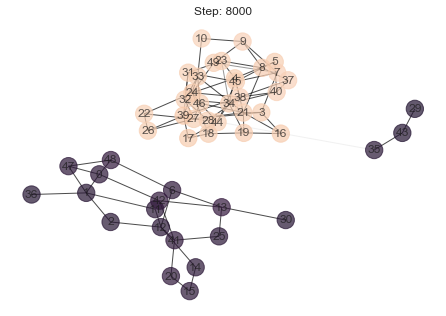

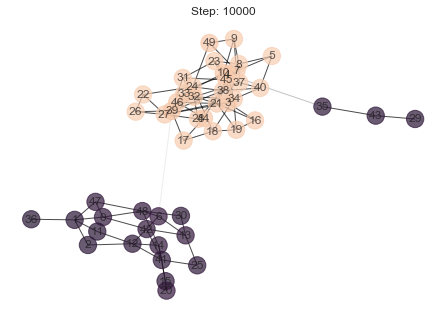

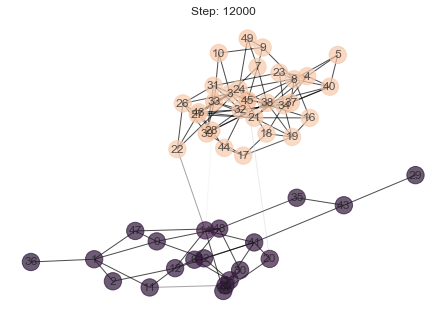

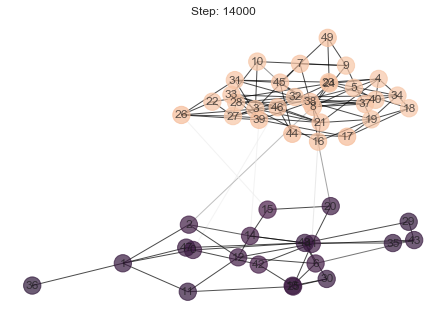

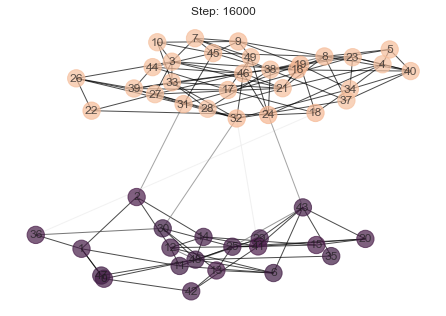

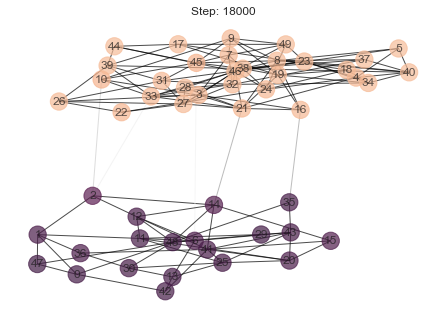

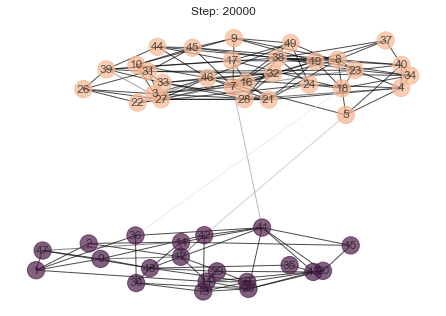

In [59]:
import warnings
warnings.filterwarnings("ignore")

sim = SocialDynamicsSimulation()
sim.initialize()
plt.figure()
sim.observe()
for i in range(10):
    for i in range(2000):
        sim.update()
    plt.figure()
    sim.observe()

# Proposed Modifications
The following two modifications to the model would be explored over the course of this assignment. 

## Multiple Topics
The model considers all opinions of an individual to be combined into one opinion attribute. However, in the real world, that is not the case, as people hold opinions on multiple topics and their opinions on each of these topics vary. Thus, we modify the model to select one topic at random from a range of topics two people might be interested in, and simulate an interaction with regards to the chosen topic. Thus, based on their opinions on the selected topic, the relationship between the individuals can strengthen or weaken. Similar opinions on the topic would strengthen the relationship while differing opinions would weaken the relationship.  

## Model Persuasiveness
Since different people have different levels of persuasiveness we choose to include a persuasiveness parameter which desrcribes how strong a person is in influencing the opinions of another person in a given interaction. Thus, when an interaction is simulated between node i and j, while the $\alpha$ from node i would be used to determine how susceptible the person is to a change in their opinion, the persuasiveness parameter $\eta$ from node j will be used to determine how influential the interaction was in modifying node i's opinion. 

The interaction will be modelled by the following equation: $\Delta o_i = \alpha_i (\eta_j+0.5) w_{ij}(o_j-o_i)$
wherein $\eta$ can take a value between 0 and 1, with lower values corresponding to weak persuation power and higher values corresponding to stronger persuation powers. 

# Local Analysis

We first analyse the normal model by looking at how a relationship evolves with respect to  opinion difference between two nodes in a relationship and the weight of that relationship by plotting a vector field comparing these two factors. 

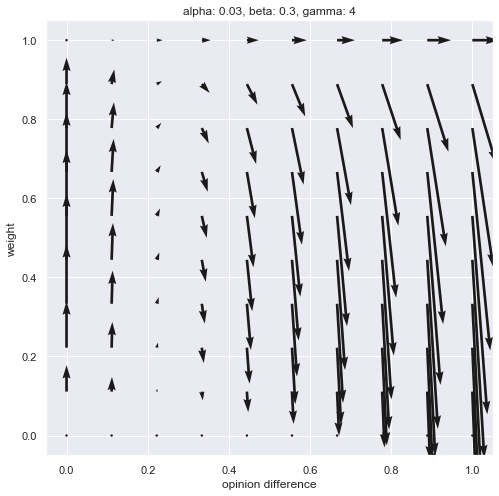

In [81]:
#2D Vector field plots
alpha = 0.08
beta = 0.3
gamma = 4

# Create grid coordinates
opinion_difference = np.linspace(0, 1, 10)
edge_weight = np.linspace(0, 1, 10)
op_dif_grid, weight_grid = np.meshgrid(opinion_difference, edge_weight)

# Compute vector field
vector_x = alpha * weight_grid * op_dif_grid
vector_y = beta * weight_grid * (1-weight_grid) * (1-gamma*op_dif_grid)

# Plot vector field
plt.figure(figsize=(8, 8))
plt.quiver(op_dif_grid, weight_grid, vector_x, vector_y, scale=0.5)
plt.title('alpha: {}, beta: {}, gamma: {}'.format(alpha, beta, gamma))
plt.xlabel('opinion difference')
plt.ylabel('weight')
plt.show()

In the normal model, we see that people with low opinion difference tend to strengthen their relationship and people with high opinion differences tend to weaken their relationship, which is logical given how the equations mean to effect these attributed were designed. 

However, we see that two thresholds arise through the vector field:
1. In terms of opinion difference, we see that the threshold exists between 0.2 and 0.4 after which the weight of the relationship starts decreasing with every successive interaction as compared to before the threshold wherein the relationship weights tend to increase with each successive interaction.
2. People with very strong relationships (weight ≈ 1) tend to move towards opposite opinions with every successive interaction, but their relationships remain strong and do not get effected by the opinion change. However, a threshold exists at around weight ≈ 0.95 below which high opinion differences cause a higher fall in relationship weight with every successive interaction.

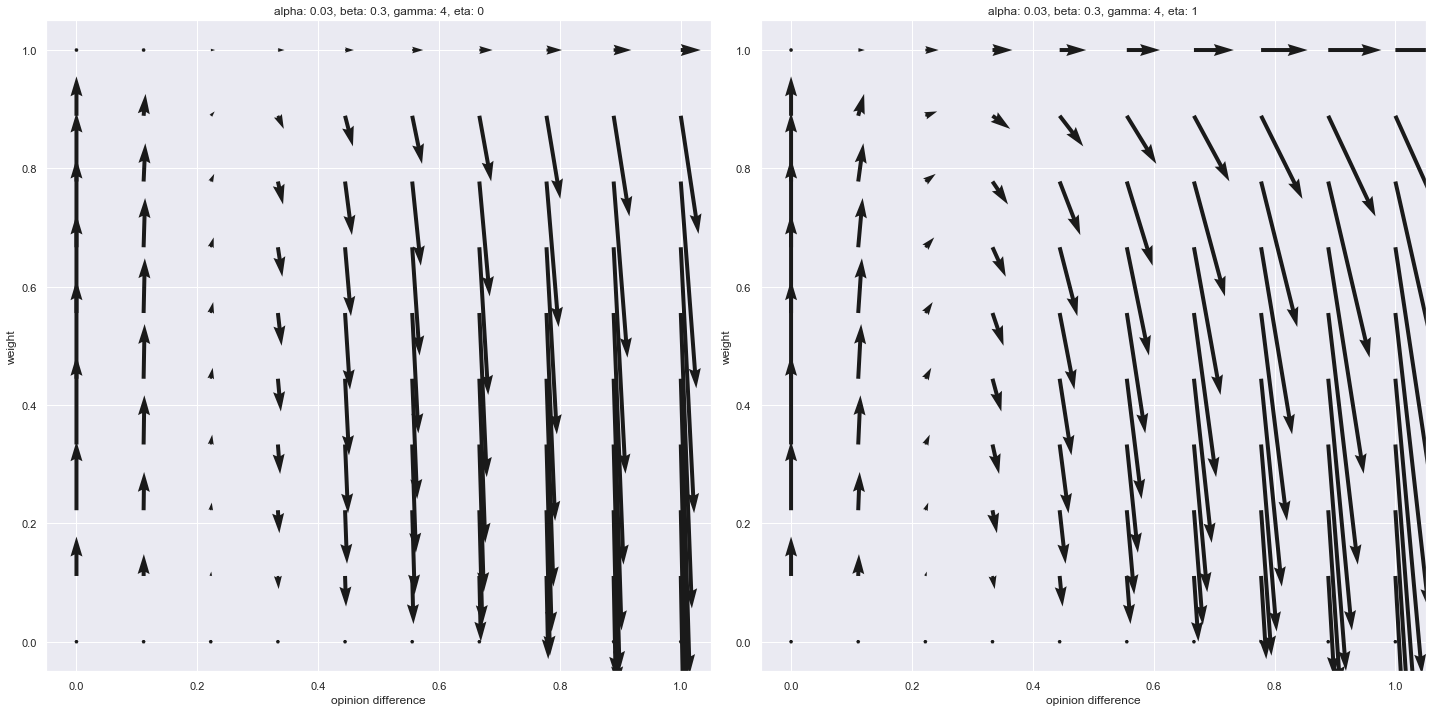

In [83]:
## 2D Vector field plots
alpha = 0.03
beta = 0.3
gamma = 4
eta = 0
eta2 = 1

# Create grid coordinates
opinion_difference = np.linspace(0, 1, 10)
edge_weight = np.linspace(0, 1, 10)
op_dif_grid, weight_grid = np.meshgrid(opinion_difference, edge_weight)

# Compute vector field
vector_x = alpha * (eta +.5) * weight_grid * op_dif_grid
vector_x2 = alpha * (eta2 +.5) * weight_grid * op_dif_grid
vector_y = beta * weight_grid * (1-weight_grid) * (1-gamma*op_dif_grid)

# Plot vector field
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes[0].quiver(op_dif_grid, weight_grid, vector_x, vector_y, scale=0.5)
axes[0].set(title = 'alpha: {}, beta: {}, gamma: {}, eta: {}'.format(alpha, beta, gamma, eta))
axes[0].set(xlabel ='opinion difference')
axes[0].set(ylabel ='weight')
axes[1].quiver(op_dif_grid, weight_grid, vector_x2, vector_y, scale=0.5)
axes[1].set(title = 'alpha: {}, beta: {}, gamma: {}, eta: {}'.format(alpha, beta, gamma, eta2))
axes[1].set(xlabel ='opinion difference')
axes[1].set(ylabel ='weight')
fig.tight_layout()




In the updated model with a persuasiveness parameter, we see a similar general behavior through the vector space keeping all other parameters the same. However, an interesting thing to note is that people with higher persuation power (higher value of eta) result in a higher opinion difference over each successive interaction. We further investigate the  effects of extreme eta values (persuasiveness parameter) while changing the values of other parameters to understand the effects on the vector space.

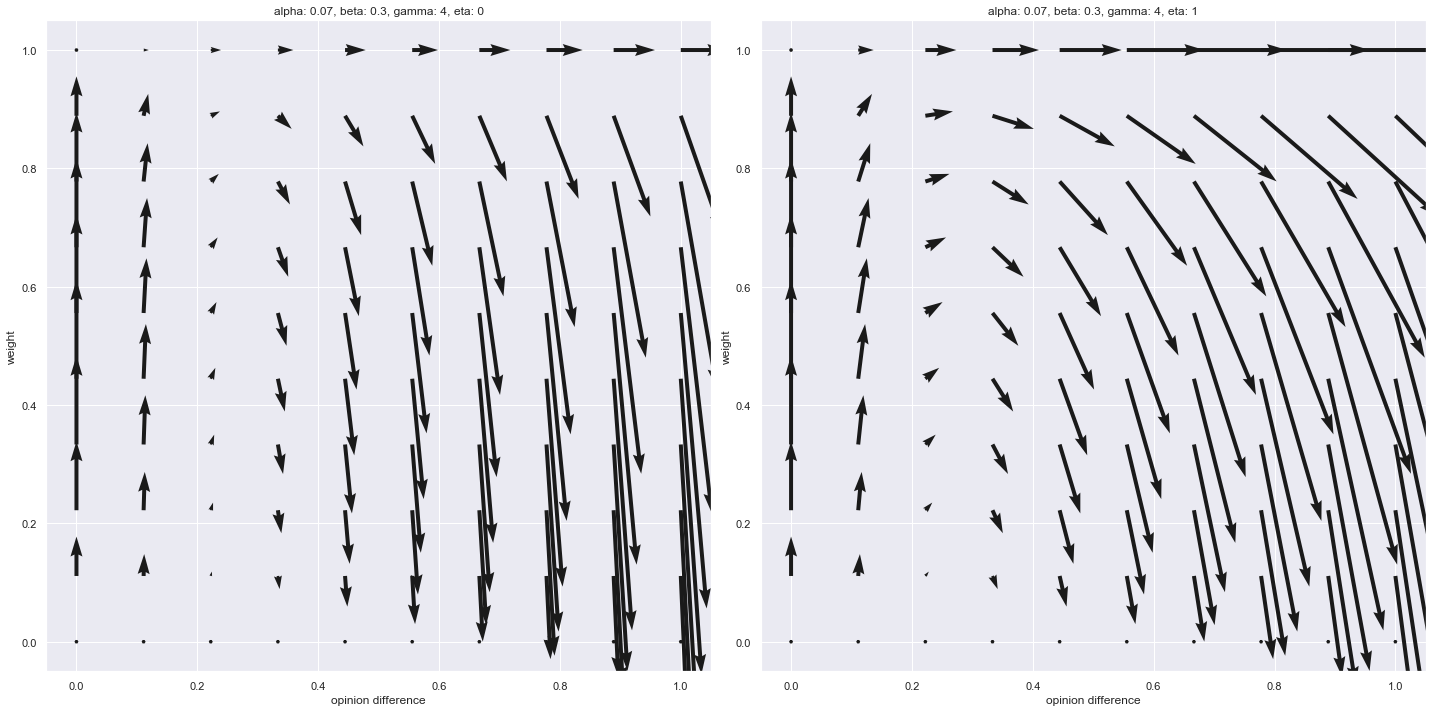

In [85]:
## 2D Vector field plots
alpha = 0.07
beta = 0.3
gamma = 4
eta = 0
eta2 = 1

# Create grid coordinates
opinion_difference = np.linspace(0, 1, 10)
edge_weight = np.linspace(0, 1, 10)
op_dif_grid, weight_grid = np.meshgrid(opinion_difference, edge_weight)

# Compute vector field
vector_x = alpha * (eta +.5) * weight_grid * op_dif_grid
vector_x2 = alpha * (eta2 +.5) * weight_grid * op_dif_grid
vector_y = beta * weight_grid * (1-weight_grid) * (1-gamma*op_dif_grid)

# Plot vector field
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes[0].quiver(op_dif_grid, weight_grid, vector_x, vector_y, scale=0.5)
axes[0].set(title = 'alpha: {}, beta: {}, gamma: {}, eta: {}'.format(alpha, beta, gamma, eta))
axes[0].set(xlabel ='opinion difference')
axes[0].set(ylabel ='weight')
axes[1].quiver(op_dif_grid, weight_grid, vector_x2, vector_y, scale=0.5)
axes[1].set(title = 'alpha: {}, beta: {}, gamma: {}, eta: {}'.format(alpha, beta, gamma, eta2))
axes[1].set(xlabel ='opinion difference')
axes[1].set(ylabel ='weight')
fig.tight_layout()

Higher alpha leads to faster opinion changes across the spectrum.

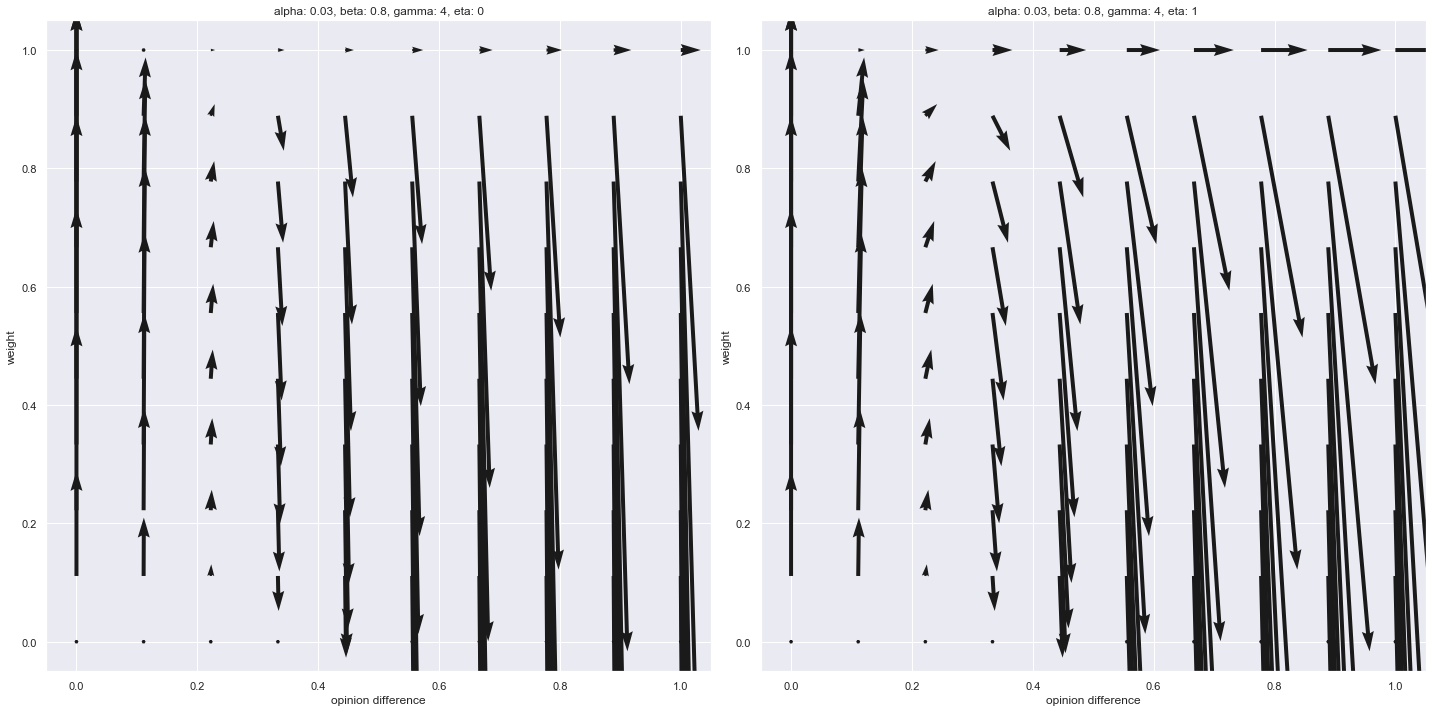

In [86]:
## 2D Vector field plots
alpha = 0.03
beta = 0.8
gamma = 4
eta = 0
eta2 = 1

# Create grid coordinates
opinion_difference = np.linspace(0, 1, 10)
edge_weight = np.linspace(0, 1, 10)
op_dif_grid, weight_grid = np.meshgrid(opinion_difference, edge_weight)

# Compute vector field
vector_x = alpha * (eta +.5) * weight_grid * op_dif_grid
vector_x2 = alpha * (eta2 +.5) * weight_grid * op_dif_grid
vector_y = beta * weight_grid * (1-weight_grid) * (1-gamma*op_dif_grid)

# Plot vector field
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes[0].quiver(op_dif_grid, weight_grid, vector_x, vector_y, scale=0.5)
axes[0].set(title = 'alpha: {}, beta: {}, gamma: {}, eta: {}'.format(alpha, beta, gamma, eta))
axes[0].set(xlabel ='opinion difference')
axes[0].set(ylabel ='weight')
axes[1].quiver(op_dif_grid, weight_grid, vector_x2, vector_y, scale=0.5)
axes[1].set(title = 'alpha: {}, beta: {}, gamma: {}, eta: {}'.format(alpha, beta, gamma, eta2))
axes[1].set(xlabel ='opinion difference')
axes[1].set(ylabel ='weight')
fig.tight_layout()

Higher value of beta leads to larger changes in the relationship weights.

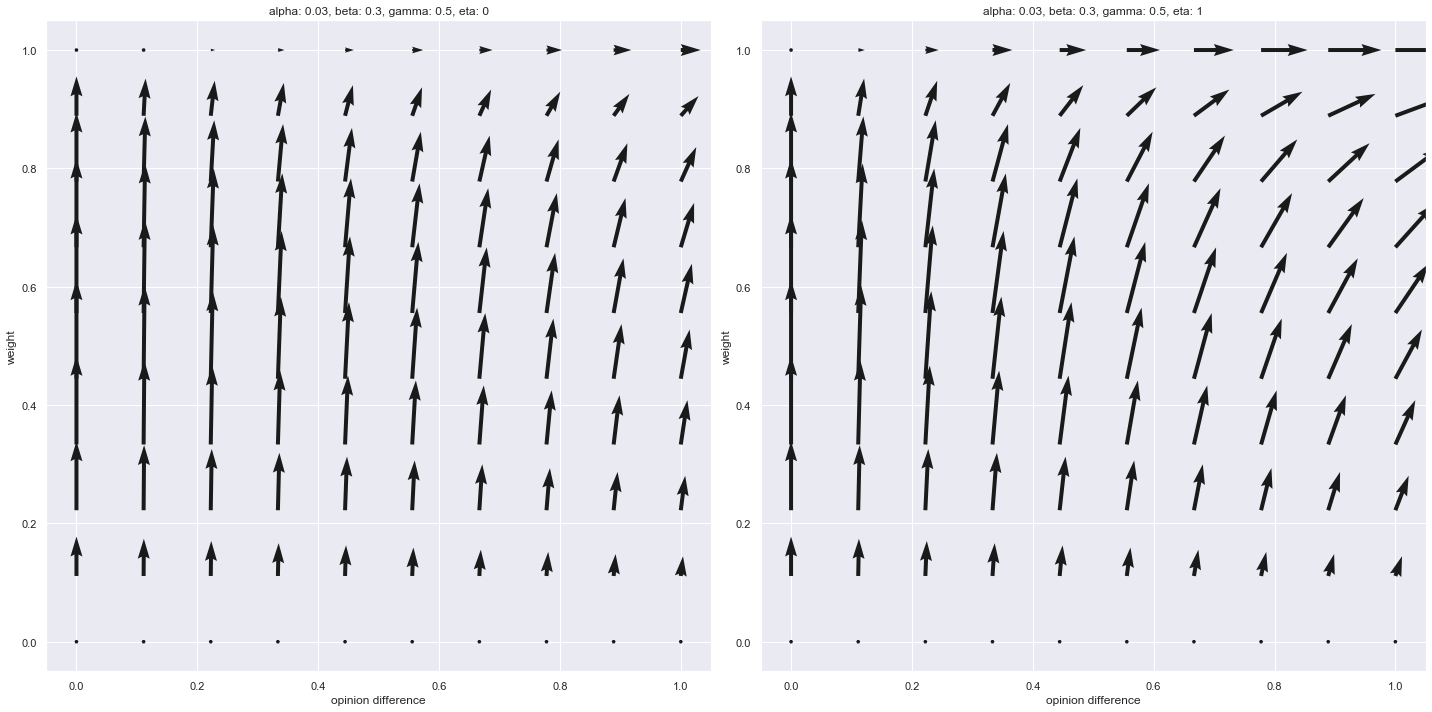

In [87]:
## 2D Vector field plots
alpha = 0.03
beta = 0.3
gamma = .5
eta = 0
eta2 = 1

# Create grid coordinates
opinion_difference = np.linspace(0, 1, 10)
edge_weight = np.linspace(0, 1, 10)
op_dif_grid, weight_grid = np.meshgrid(opinion_difference, edge_weight)

# Compute vector field
vector_x = alpha * (eta +.5) * weight_grid * op_dif_grid
vector_x2 = alpha * (eta2 +.5) * weight_grid * op_dif_grid
vector_y = beta * weight_grid * (1-weight_grid) * (1-gamma*op_dif_grid)

# Plot vector field
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes[0].quiver(op_dif_grid, weight_grid, vector_x, vector_y, scale=0.5)
axes[0].set(title = 'alpha: {}, beta: {}, gamma: {}, eta: {}'.format(alpha, beta, gamma, eta))
axes[0].set(xlabel ='opinion difference')
axes[0].set(ylabel ='weight')
axes[1].quiver(op_dif_grid, weight_grid, vector_x2, vector_y, scale=0.5)
axes[1].set(title = 'alpha: {}, beta: {}, gamma: {}, eta: {}'.format(alpha, beta, gamma, eta2))
axes[1].set(xlabel ='opinion difference')
axes[1].set(ylabel ='weight')
fig.tight_layout()

A gamma below one means that the relationship weight only increase no matter what the opinion difference is. With a higher eta, the change in opinion difference becomes stronger.

# Implementation

In [89]:
#Adapted from C. Scheffler: https://gist.github.com/cscheffler/f8f8416513356e184e9568fa69c90889

class SocialDynamicsSimulationM2:
    '''
    A modified model version of the social dynamics simulation model
    '''

    def __init__(self, network_size=50, alpha=0.03, beta=0.3, gamma=4, eta = 0, topics_switch= False, topics = 10, opmean = 0.5, opsd = 0.3, ):
        '''
        Inputs:

            network_size (int) The number of nodes in the random Watts-Strogatz
              small-world network. 
              Default: 50

            alpha (float) The rate at which nodes adjust their opinions to
              match neighboring nodes' opinions during interactions.
              Default: 0.03

            beta (float) The rate at which edge weights are changed in
              response to differing opinions. 
              Default: 0.3

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4
              
            eta (float) The persuasiveness parameter of nodes which affects the
              change in the opinion of the node on the opposite side of edge during
              an interaction.The parameter ranges from 0 to 1. 
              Default: 0.5
              
            topics_switch (booleans) Determines if the model incorporates mutliple
              opinions for the nodes in the model.
              Default: False
              
            topics (int) The number of topics in which a given node holds opinions in. 
              Default: 10
              
            opmean (float) The mean of all the opinion attributes of a given node.
              Default: .05
            
            opsd (int) The standard deviation of all the opinion attributes of a given
            node. 
              Default: 0.3
        '''
        self.network_size = network_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.eta = eta
        self.topics_switch = topics_switch
        if self.topics_switch:
            self.topics = topics
            self.opmean = opmean
            self.opsd = opsd    

    def initialize(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.5.
        '''
        self.graph = nx.watts_strogatz_graph(50, 5, 0.5)
        #setting the initial weight of all edges to 0.5
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 0.5
        for node in self.graph.nodes:
            
        # initializing the multiple topics array and inputing the opinions based on a uniform distribution
            if self.topics_switch: 
                self.graph.nodes[node]['opinion'] = stats.truncnorm(
                                                    (0 - self.opmean) / self.opsd,
                                                    (1 - self.opmean) / self.opsd,
                                                    loc=self.opmean,
                                                    scale=self.opsd).rvs(self.topics)
                self.graph.nodes[node]['eta'] = (random.randint(0,100))*0.01
                self.graph.nodes[node]['beta'] = self.beta
                self.graph.nodes[node]['gamma'] = self.gamma
                
                
            # just select one opinion from a random uniform distribution
            else: 
                self.graph.nodes[node]['opinion'] = [random.randint(0, 1)]
                #each node gets a random value of eta between 0 and 1 to simulate people
                #with different persuation levels based on a uniform distribution
                self.graph.nodes[node]['eta'] = (random.randint(0,100))*0.01
                self.graph.nodes[node]['beta'] = self.beta
                self.graph.nodes[node]['gamma'] = self.gamma
                

            
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0

    def observe(self):
        '''
        Draw the state of the network.
        '''
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        plt.clf()
        nx.draw(
            self.graph, pos=self.layout, with_labels=True,
            node_color=[np.mean(self.graph.nodes[i]['opinion']) for i in self.graph.nodes],
            edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)
        plt.title('Step: ' + str(self.step))

    def update(self):
        if random.uniform(0, 1) < 0.01:
            # Create a new edge with weight 0.5 between two unconnected nodes
            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=0.5)
        else:
            # Select a random edge and update node opinions and edge weight
            edge = random.choice(list(self.graph.edges))
            weight = self.graph.edges[edge]['weight']
            # initializing the topics array switch and choosing a random topic if the switch is on,
            # or only using the one available topic
            if self.topics_switch: 
                topic = np.random.choice(self.topics)
            else: 
                topic = 0 
            
            # getting the opinions of both nodes on the selected edge
            opinion = [self.graph.nodes[j]['opinion'][topic] for j in edge]
            
            for i in [0, 1]:
                #getting the value of eta from the node on the opposite side of the edge
                eta = self.graph.nodes[edge[abs(i-1)]]['eta']
                
                #calculating the updated opinion for the edge
                self.graph.nodes[edge[i]]['opinion'][topic] = (
                    opinion[i] + self.alpha * (eta + 0.5) * weight * (opinion[1-i] - opinion[i]))
            
            #inputting beta and gamma
            beta = np.mean([self.graph.nodes[edge[0]]['beta'],self.graph.nodes[edge[1]]['beta']])
            gamma = np.mean([self.graph.nodes[edge[0]]['gamma'],self.graph.nodes[edge[1]]['gamma']])
            
            #updating the edge weights based on beta and gamma
            self.graph.edges[edge]['weight'] = ( weight + beta * weight * (1-weight) *(1 - gamma * abs(opinion[0] - opinion[1])))
            
            # Remove very weak connections
            if self.graph.edges[edge]['weight'] < 0.1:
                self.graph.remove_edge(*edge)
                
        self.step += 1

# Simulations

### Simulation 1 with default parameter values

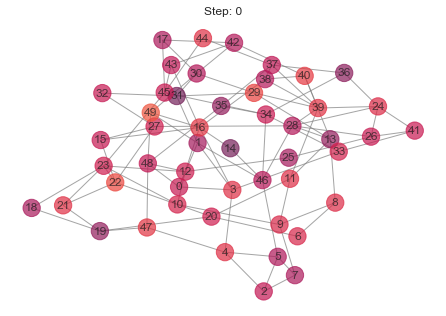

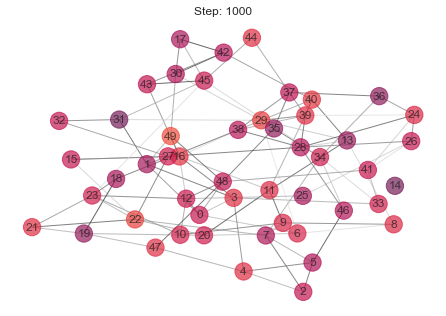

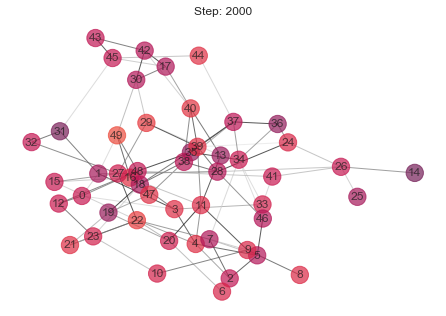

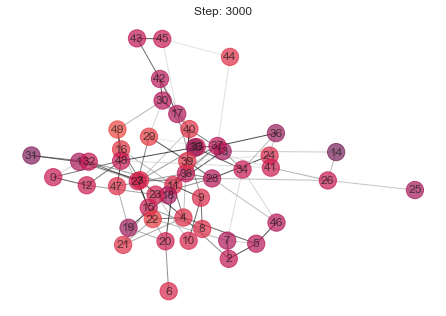

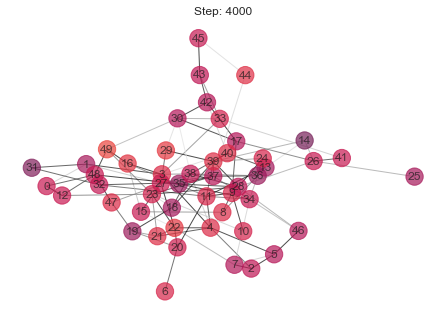

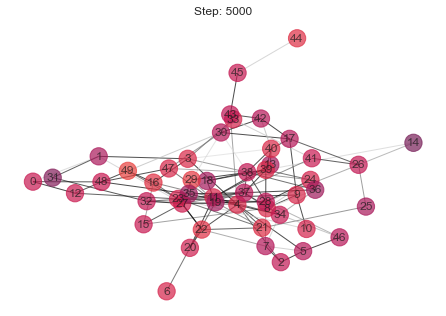

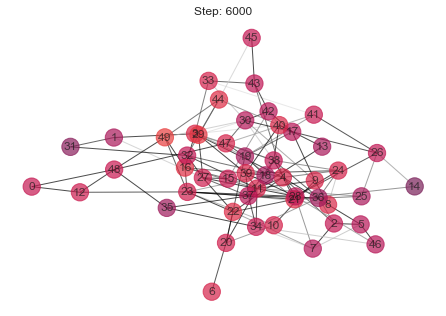

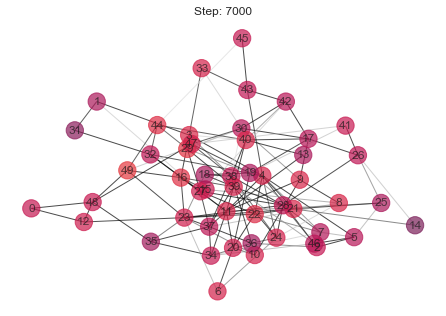

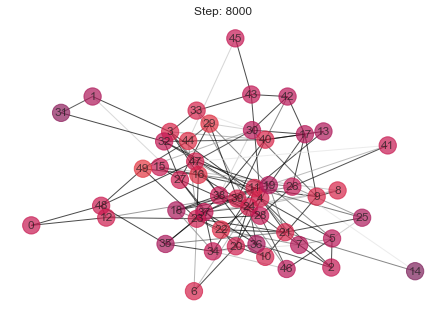

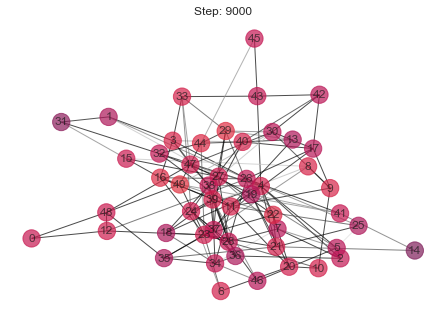

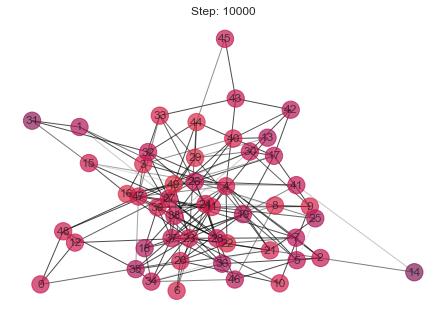

In [93]:
import warnings
warnings.filterwarnings("ignore")

simM2 = SocialDynamicsSimulationM2(topics_switch = True)
simM2.initialize()
plt.figure()
simM2.observe()
for i in range(10):
    for i in range(1000):
        simM2.update()
    plt.figure()
    simM2.observe()

### Analysis

If we compare the results of the simulation of our updated model to the previous model, we see no formation of clusters. This is because each node in the updated simulation holds multiple opinion values which are distributed over a normal distribution. The simulation shows us that as these values interact with each other through our pre-defined equations, we do not see clustering of nodes to create seperate social groups. The main reason for this is that the opinion values distributed along a normal distribution ensure that every person in the society has varying views on different topics and most of them are neutral but a small percentage of them are on either extremes. In the real world, this would translate to people being subjected to news from multiple sources and perspectives so that they can have a diverse range of opinions and people would not be as polarized they are. However, in the world, we see that most news sources tend to keep their news articles biased to one side, which makes people's opinions biased towards that side, leading to clustering and polarization as seen in the previous model.

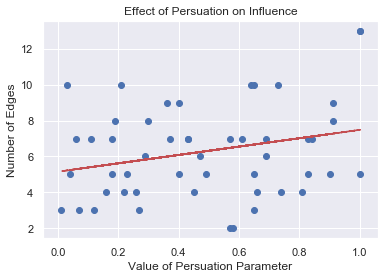

In [94]:
etas = [simM2.graph.nodes[i]['eta'] for i in simM2.graph.nodes]
edges = []
edge_len = []

for i in simM2.graph.nodes:
    edges.append(simM2.graph.edges(i))

for i in range(len(edges)):
    edge_len.append(len(edges[i]))
    
plt.scatter(etas,edge_len)
z = np.polyfit(etas, edge_len, 1)
p = np.poly1d(z)
plt.plot(etas,p(etas),"r--")
plt.ylabel('Number of Edges')
plt.xlabel('Value of Persuation Parameter')
plt.title('Effect of Persuation on Influence')
plt.show()

We also plot the value of the persuation parameter of each node in the network against the number of edges (relationships) that node has. We see an interesting result as the trendline points us towards the fact that nodes with higher persuation levels tend to have more edges. In the real world, this would translate to the fact that people who are more pesuasive tend to be have more relationships. The trendline shows that the average number of relationships increases from approximately 5 to approximately 8 with the increase in the pesuation parameter.

### Simulation 2 with higher value for the alpha parameter.

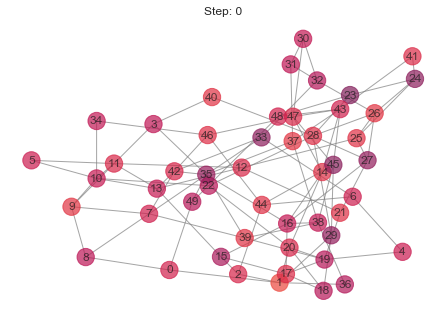

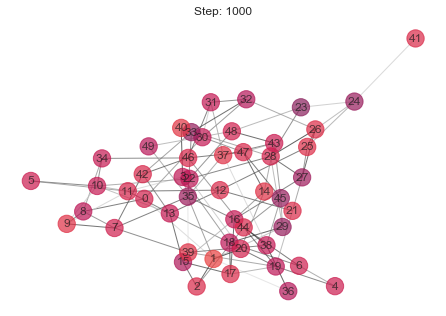

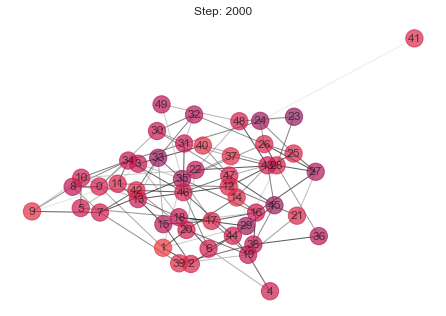

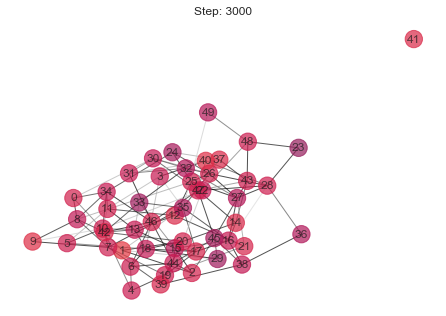

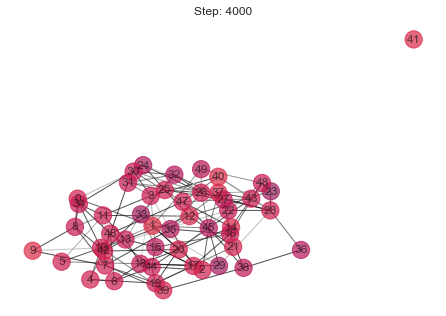

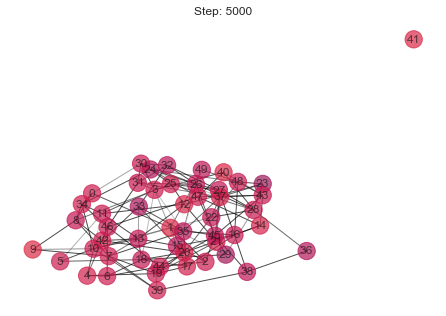

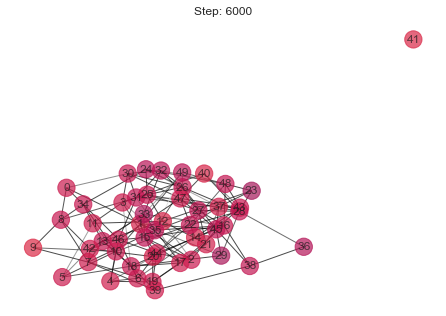

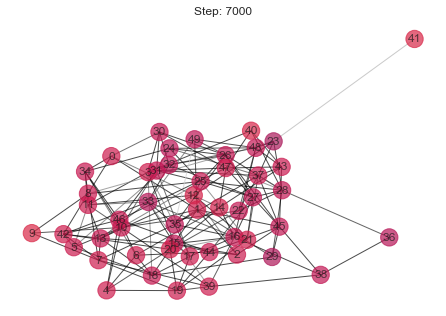

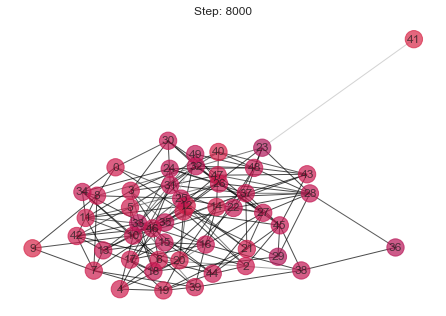

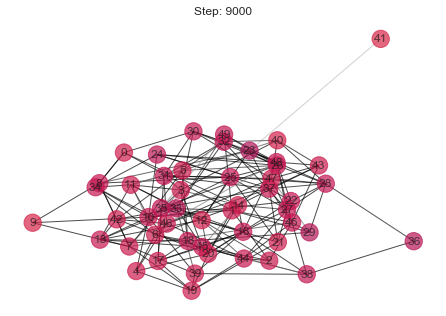

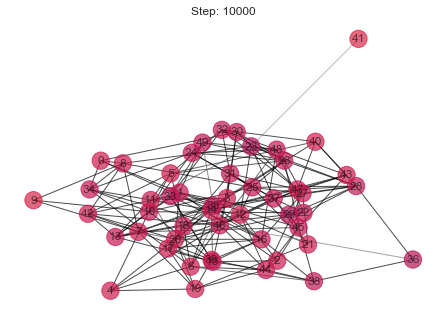

In [91]:
import warnings
warnings.filterwarnings("ignore")

simM3 = SocialDynamicsSimulationM2(topics_switch = True, alpha = 0.07,
beta = 0.3,
gamma = 4,
eta = 1 )
simM3.initialize()
plt.figure()
simM3.observe()
for i in range(10):
    for i in range(1000):
        simM3.update()
    plt.figure()
    simM3.observe()

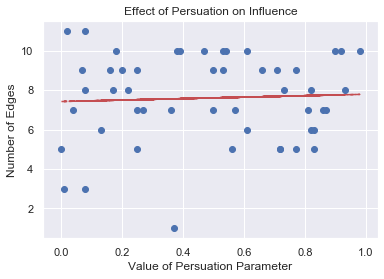

In [99]:
etas2 = [simM3.graph.nodes[i]['eta'] for i in simM3.graph.nodes]
edges2 = []
edge_len2 = []

for i in simM3.graph.nodes:
    edges2.append(simM3.graph.edges(i))

for i in range(len(edges2)):
    edge_len2.append(len(edges2[i]))
    
plt.scatter(etas2,edge_len2)
z = np.polyfit(etas2, edge_len2, 1)
p = np.poly1d(z)
plt.plot(etas2,p(etas2),"r--")
plt.ylabel('Number of Edges')
plt.xlabel('Value of Persuation Parameter')
plt.title('Effect of Persuation on Influence')
plt.show()

The alpha parameter tells us how much a person is influenced by the other person's opinion. Hence for a higher value of alpha, the plot tells that the average number of relationships that a node has is higher than in the previous scenario, and it stays true to the hypothesis that higher persuation levels lead to higher number of relationships. This plot also shows us that when people in a society tend to be more gullible, they are more connected with each other.

### Simulation 3 with higher beta parameter

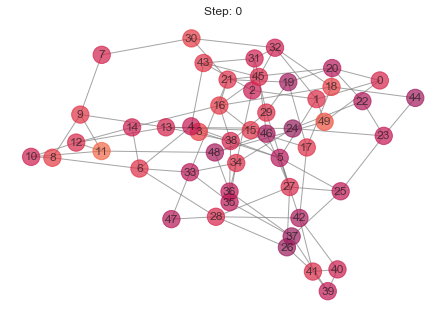

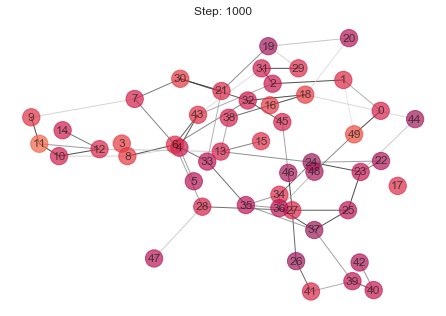

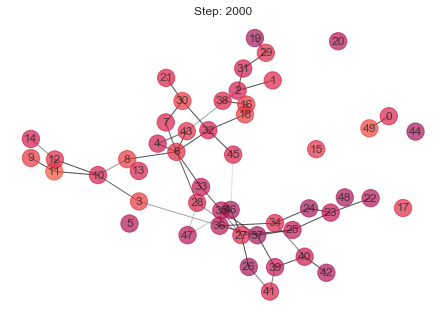

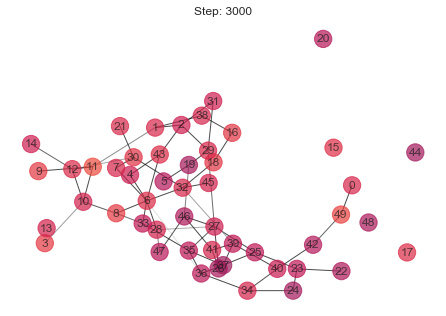

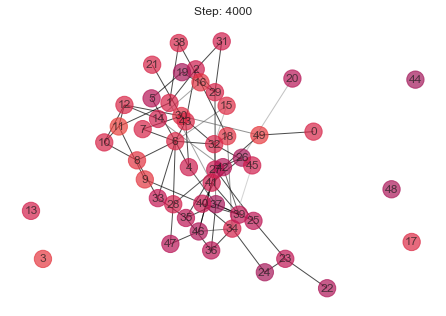

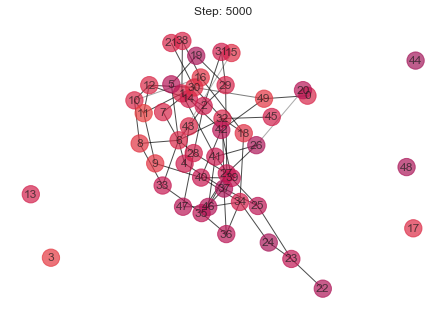

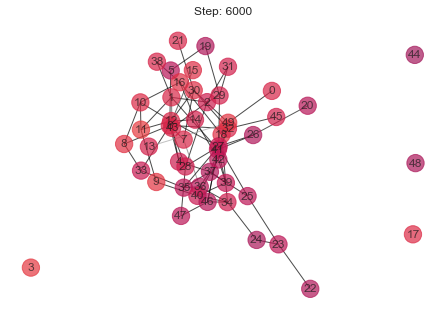

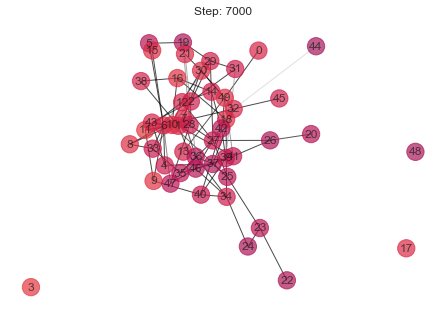

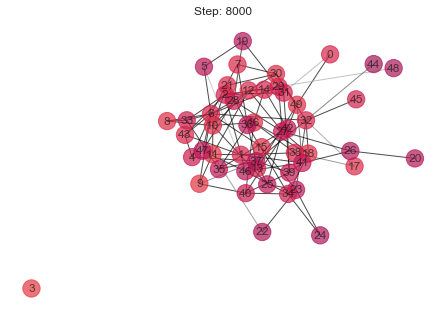

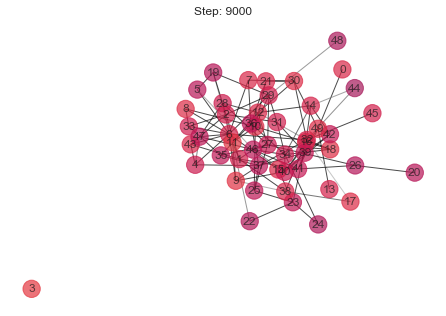

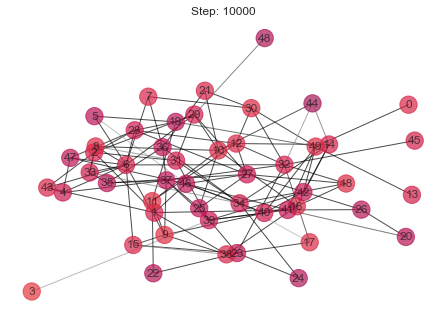

In [98]:
import warnings
warnings.filterwarnings("ignore")

simM4 = SocialDynamicsSimulationM2(topics_switch = True, alpha = 0.03,
beta = 0.7,
gamma = 4,
eta = 1 )
simM4.initialize()
plt.figure()
simM4.observe()
for i in range(10):
    for i in range(1000):
        simM4.update()
    plt.figure()
    simM4.observe()

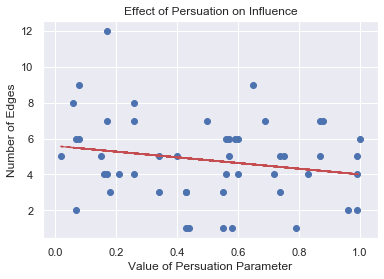

In [100]:
etas3 = [simM4.graph.nodes[i]['eta'] for i in simM4.graph.nodes]
edges3 = []
edge_len3 = []

for i in simM4.graph.nodes:
    edges3.append(simM4.graph.edges(i))

for i in range(len(edges3)):
    edge_len3.append(len(edges3[i]))
    
plt.scatter(etas3,edge_len3)
z = np.polyfit(etas3, edge_len3, 1)
p = np.poly1d(z)
plt.plot(etas3,p(etas3),"r--")
plt.ylabel('Number of Edges')
plt.xlabel('Value of Persuation Parameter')
plt.title('Effect of Persuation on Influence')
plt.show()

The beta parameter models how quickly the relationship between the two interacting nodes change. Thus, for a higher value of beta, each interaction with a person from the opposing opinion would weaken the relationship between the individual significantly. A by-product of this dynamic can be seen through the above graph, which for the third simulation shows that people with more persuation power tend to have lesser friends. Thus, in a society where people only want to interact with other people having similar opinions, more persuasive people lose out on influence. 

# Conclusion

Hence, through these simulations, we can take these main takeaways:
1. People should be exposed to a variety of opinions on different topics so that their opinions follow a normal distribution and the society becomes less polarized and more united.
2. A society where people are gullible, the people tend to have more relationships than a society wherein people are hard to influence, which also results in more unity amongst people. 
3. In a society wherein people stick to their opinions and don't like to change their opinions, higher persuasiveness can end up decreasing the influence of that individual in the society. 